# Investigate Vivek's pulse injection

In [1]:
%matplotlib notebook
from pylab import *
import numpy as np
from craco.search_pipeline import location2pix, get_grid_lut_from_plan, grid_candidates,wait_for_starts,waitall,print_candidates
from craco.search_pipeline import NBINARY_POINT_FDMTIN 
import craco
import craco.search_pipeline
from craco.pyxrtutil import *
import craft.craco_plan

from craft import uvfits

from craft.craco_plan import PipelinePlan
from craft.craco import printstats
import logging
import time
from Visibility_injector.inject_in_fake_data import FakeVisibility


In [2]:
%cd /data/craco/ban115/pipeline-runs/1xdm100
fits='frb_d0_t0_a1_sninf_lm00.fits'

#fits='/data/craco/ban115/test_data/nant3/frb_d0_t0_a1_sninf_lm00/frb_d0_t0_a1_sninf_lm00.fits' # 3 antenna data
xclbin='/data/craco/ban115/builds/binary_container_1_10688715.xclbin'
#xclbin='/data/craco/ban115/builds/binary_container_01482863.xclbin'
alloc_device_only=True

/data/craco/ban115/pipeline-runs/1xdm100


In [3]:
ls

1xdm100.yml                                     lut.txt
frb_d0_t0_a1_sninf_lm00.fits                    test1.cand
frb_d0_t0_a1_sninf_lm00.fits.ddreader.txt       uv_data.ddreader.txt
frb_d0_t0_a1_sninf_lm00.fits.doshift.lower.txt  uv_data.doshift.lower.txt
frb_d0_t0_a1_sninf_lm00.fits.doshift.upper.txt  uv_data.doshift.upper.txt
frb_d0_t0_a1_sninf_lm00.fits.gridlut.lower.txt  uv_data.gridlut.lower.txt
frb_d0_t0_a1_sninf_lm00.fits.gridlut.upper.txt  uv_data.gridlut.upper.txt
frb_d0_t0_a1_sninf_lm00.fits.padlut.lower.txt   uv_data.padlut.lower.txt
frb_d0_t0_a1_sninf_lm00.fits.padlut.upper.txt   uv_data.padlut.upper.txt
frb_d0_t0_a1_sninf_lm00.fits.uvgrid.split.txt   uv_data.uvgrid.split.txt
frb_d0_t0_a1_sninf_lm00.fits.uvgrid.txt         uv_data.uvgrid.txt


In [4]:
values = craco.search_pipeline.get_parser().parse_args([])
print(values)

Namespace(boxcar_weight='sum', cand_file='candidates.txt', cell=None, device=0, dump_boxcar_hist_buf=None, dump_candidates=None, dump_fdmt_hist_buf=None, dump_mainbufs=None, dump_uvdata=None, fdmt_scale=1.0, fft_scale=10.0, fft_shift1=0, fft_shift2=7, injection_file=None, input_scale=1.0, max_ndm=1024, nblocks=None, nbox=8, ncin=32, ndm=2, ndout=186, npix=256, nt=256, nuvmax=8192, nuvwide=8, os='2.1,2.1', run_fdmt=True, run_image=True, show=False, show_candidate_grid=None, threshold=10.0, uv='frb_d0_lm0_nt16_nant24.fits', verbose=False, wait=False, xclbin='binary_container_1.xclbin.golden')


In [5]:
device = pyxrt.device(1)
xbin = pyxrt.xclbin(xclbin)
uuid = device.load_xclbin(xbin)

In [6]:
f = uvfits.open(fits)
plan = PipelinePlan(f, "--ndm 511 --max-nbl 3")

parsing values --ndm 511 --max-nbl 3
Upper registers [(37, 6), (37, 7), (38, 7), (38, 8), (39, 8), (39, 9), (40, 9), (40, 10), (40, 11), (41, 11), (102, 11), (41, 12), (42, 12), (102, 12), (42, 13), (43, 13), (102, 13), (43, 14), (102, 14), (103, 14), (18, 15), (43, 15), (44, 15), (103, 15), (18, 16), (19, 16), (44, 16), (45, 16), (103, 16), (19, 17), (20, 17), (45, 17)]
Lower registers [(26, 47), (26, 48), (27, 48), (27, 49), (28, 49), (28, 50), (29, 50), (30, 51), (31, 51), (31, 52), (32, 52), (32, 53), (33, 53), (33, 54), (34, 54), (35, 54), (35, 55), (36, 55), (53, 55), (54, 55), (6, 56), (36, 56), (37, 56), (54, 56), (55, 56), (7, 57), (8, 57), (37, 57), (38, 57), (55, 57), (56, 57), (8, 58)]


In [7]:
p = craco.search_pipeline.Pipeline(device, xbin, plan, alloc_device_only)

Kernel krnl_ddgrid_reader_4cu:krnl_ddgrid_reader_4cu_1 has groups
GID=0=32
GID=1=-1
GID=2=-1
GID=3=-1
GID=4=-1
GID=5=15
Kernel krnl_grid_4cu:krnl_grid_4cu_1 has groups
GID=0=-1
GID=1=-1
GID=2=-1
GID=3=-1
GID=4=-1
GID=5=6
Kernel krnl_grid_4cu:krnl_grid_4cu_2 has groups
GID=0=-1
GID=1=-1
GID=2=-1
GID=3=-1
GID=4=-1
GID=5=7
Kernel krnl_grid_4cu:krnl_grid_4cu_3 has groups
GID=0=-1
GID=1=-1
GID=2=-1
GID=3=-1
GID=4=-1
GID=5=20
Kernel krnl_grid_4cu:krnl_grid_4cu_4 has groups
GID=0=-1
GID=1=-1
GID=2=-1
GID=3=-1
GID=4=-1
GID=5=21
Kernel fft2d:fft2d_1 has groups
Kernel fft2d:fft2d_2 has groups
Kernel fft2d:fft2d_3 has groups
Kernel fft2d:fft2d_4 has groups
Kernel krnl_boxc_4cu:krnl_boxc_4cu_1 has groups
GID=0=-1
GID=1=-1
GID=2=-1
GID=3=54
GID=4=54
GID=5=4
Kernel fdmt_tunable_c32:fdmt_tunable_c32_1 has groups
GID=0=52
GID=1=32
GID=2=53
GID=3=53
GID=4=14
Allocated 360428 bytes flags=flags.normal groupid=6 address=0x60000000
Allocated 360428 bytes flags=flags.normal groupid=7 address=0x70000000
Allo

In [8]:
fv = FakeVisibility(plan, '1xdm100.yml', int(1e6))

In [9]:
db = fv.get_fake_data_block()


In [10]:
inputd = next(db)

In [11]:
inputd.shape

(190, 256, 256)

<IPython.core.display.Javascript object>


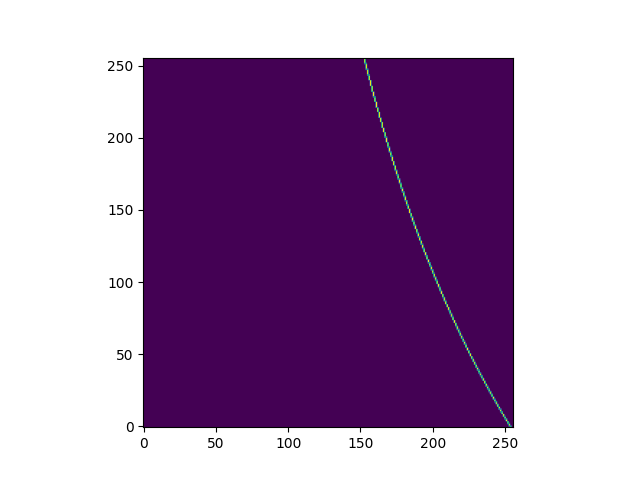

In [12]:
figure()
imshow(inputd[0,:,:].real, origin='lower')

In [13]:
p.clear_buffers(values)
p.copy_input(inputd, values)

<IPython.core.display.Javascript object>


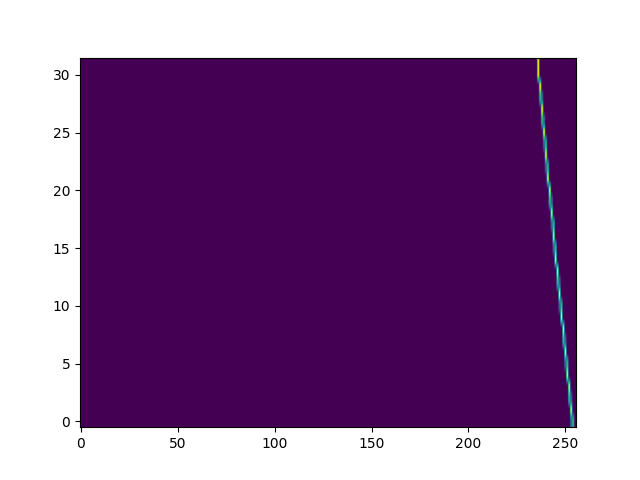

In [14]:
figure()
imshow(p.inbuf.nparr[0,:,:,0,0].T, aspect='auto', origin='lower')

In [15]:
tblk=0
values.run_fdmt = True
values.run_image = True
values.threshold = 5
p.run(tblk, values).wait()

In [16]:
#mainbuf = p.copy_mainbuf()
p.all_mainbufs[0].copy_from_device()
mainbuf =p.all_mainbufs[0].nparr

In [17]:
mainbuf.shape
print(mainbuf.max())

82


<IPython.core.display.Javascript object>


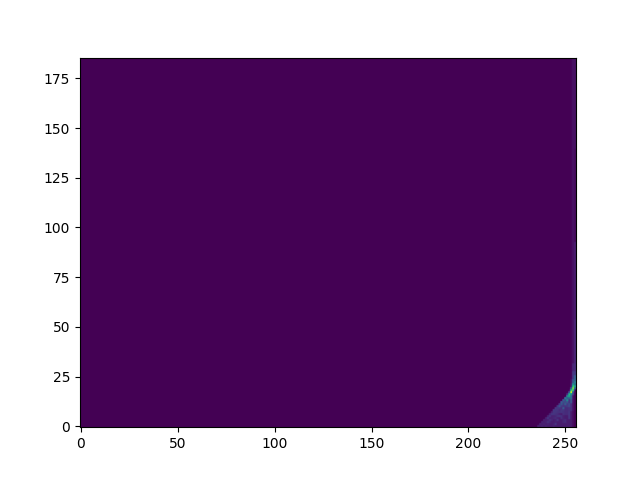

In [18]:
figure()
imshow(mainbuf[0,:,0,:,0,0], aspect='auto', origin='lower')

In [20]:
p.boxcar_history.copy_from_device()

In [21]:
p.boxcar_history.shape

(1024, 7, 256, 256)

<IPython.core.display.Javascript object>


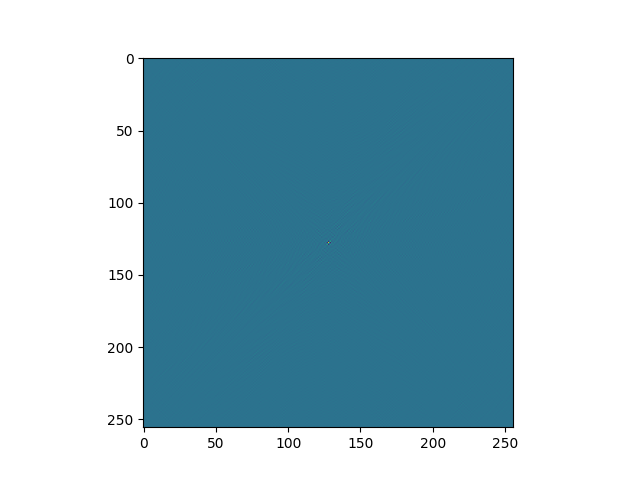

11135


In [26]:
figure()
idm = 254-152
bc = p.boxcar_history.nparr
print(bc.max())
imshow(np.fft.fftshift(p.boxcar_history.nparr[100,2,:,:]))


In [27]:
print(printstats(bc))

 max/min/mean/rms/sum/S/N = 1.11e+04/-6.78e+03/-1.52e-01/1.01e+01/-7.13e+07/1104.3 peak at (100, 2, 0, 0)


In [29]:
cands = p.get_candidates()
len(cands)

328

In [32]:
print_candidates(cands, 256, 0)

# SNR	upix	vpix	boxc_width	time	dm	iblk	rawsn

5.2	128	128	7		205	44	0	333
5.2	128	128	7		206	45	0	334
5.2	128	128	7		207	46	0	333
5.1	128	128	6		207	47	0	326
5.2	128	128	7		208	47	0	333
5.2	128	128	7		209	48	0	333
5.2	128	128	7		210	49	0	335
5.5	128	128	7		210	50	0	353
5.5	128	128	7		211	51	0	353
5.1	128	128	7		216	51	0	327
5.5	128	128	7		212	52	0	354
5.1	128	128	7		217	52	0	327
5.7	128	128	7		213	53	0	365
5.6	128	128	7		216	53	0	359
5.7	128	128	7		215	54	0	367
6.1	128	128	7		216	54	0	388
5.7	128	128	6		215	55	0	366
6.0	128	128	7		217	55	0	386
5.2	128	128	7		224	55	0	331
6.2	128	128	5		215	56	0	394
6.0	128	128	7		218	56	0	386
5.7	128	128	7		225	56	0	366
6.0	128	128	5		215	57	0	381
6.7	128	128	7		218	57	0	427
5.2	128	128	7		225	57	0	333
5.2	128	128	3		215	58	0	335
6.7	128	128	7		219	58	0	430
5.5	128	128	7		231	58	0	354
5.3	128	128	7		232	58	0	338
6.7	128	128	7		220	59	0	431
5.7	128	128	7		227	59	0	367
5.0	128	128	7		232	59	0	322
6.7	128	128	7		221	60	0	430
6.0	128	128	7		226	60	0	386
5